In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

theta_g1 = []

mu_a = [0.5, 0]
sigma_a = [[0.3, 0], [0, 2]]

theta_g2 = []
mu_b = [2.5, 0]
sigma_b = [[0.3, 0], [0, 2]]



np.random.seed(0)
theta_g1 = np.random.multivariate_normal(mu_a, sigma_a, 10000)
theta_g2 = np.random.multivariate_normal(mu_b, sigma_b, 10000)
plt.scatter( theta_g1[:,0], theta_g1[:,1], color='red')
plt.scatter( theta_g2[:,0], theta_g2[:,1], color='blue')
plt.show



<function matplotlib.pyplot.show>

There is a nice discussion that is intuitive and easy to follow on Metropolis-Hastings Algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm). [Here](http://galton.uchicago.edu/~eichler/stat24600/Handouts/l12.pdf) are some more nice notes on MH. Implementation of Metropolis-Hastings Algorithm is followed [Here](https://github.com/bikz05/ipython-notebooks/blob/master/probabilistic-robotics/metropolis-hastings-algos.ipynb).

The pseudo code for Metropolis-Hastings Algorithm is discussed below --

* Initialize $x_0$.
    * For $i = 1 \text{ to } N-1$
        * Sample $u \sim \mathcal{U}_{[0, 1]}$
        * Sample $x^{*} \sim q(x|x^{(i)})$
        * If $u < \mathcal{A}(x^{(i)}, x^*) = \min\{\frac{p(x^*)q(x^{(i)}|x^*)}{p(x^{(i)})q(x^*|x^{(i)})}\}$
            * $x^{i+1} = x^{*}$
        * else
            * $x^{i+1} = x^{(i)}$

In [11]:
# Assumption: p(x) is directly proportional to q(x|x_i-1)
def p(x): 
    return (norm((0.5,0), (0.3, 0.2)).pdf(x)+ norm((2.5,0), (0.3, 0.2)).pdf(x))/2 

# Initialize x_0
x = [5.0,5.0]
# Number of samples
N = 20000
# I think when we are not sure
# we should keep the `sigma` as large
# as possible, so that we sample the entire space
sigma = [0.5, 0.5]
# List of sampled points
#x_sampled = np.zeros((N,2))
x_sampled = []
for i in range(N-1):
    # `u` lies in [0, 1]
    u = np.random.uniform()
    # Sample `x_star` from a gaussian distribution centered around `x`
    x_star = norm(x, sigma).rvs()
    if u < min((p(x_star)*norm(x_star, sigma).pdf(x))/(p(x)*norm(x, sigma).pdf(x_star))):
        x = x_star
        x_sampled.append(x)

mean of MH sampled points:
[  1.42070108e+00   1.10708088e-03]
variance of MH sampled points:
[ 1.04405391  0.26985166]
acceptable points:
5467


<function matplotlib.pyplot.show>

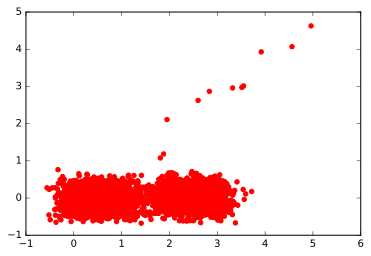

In [12]:
x_sampled = np.asarray(x_sampled)
plt.scatter( x_sampled[:,0], x_sampled[:,1], color='red')
print 'mean of MH sampled points:'
print  np.mean(x_sampled, axis=0)
print 'variance of MH sampled points:'
print  np.std(x_sampled, axis=0)
print 'acceptable points:'
print x_sampled.shape[0]

#plt.plot( x_sampled[:,0], x_sampled[:,1], color='red')

plt.show

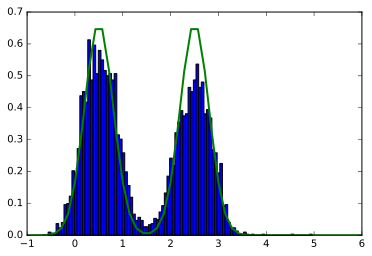

In [13]:
def p_x(x): 
    return (norm((0.5), (0.3)).pdf(x)+ norm((2.5), (0.3)).pdf(x))/2


x_hist = plt.hist(x_sampled[:,0], 100, normed=1)
x = np.linspace(-1,6) 
h = plt.plot(x, p_x(x), lw=2)
plt.show()

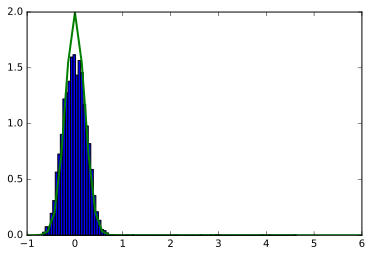

In [14]:
def p_y(y): 
    return (norm((0), (0.2)).pdf(y)+ norm((0), (0.2)).pdf(y))/2


y_hist = plt.hist(x_sampled[:,1], 100, normed=1)
y = np.linspace(-1,6) 
h = plt.plot(y, p_y(y), lw=2)
plt.show()

In [15]:
# Assumption: p(x) is directly proportional to q(x|x_i-1)
def p(x): 
    return (norm((0.5,0), (0.3, 0.2)).pdf(x)+ norm((2.5,0), (0.3, 0.2)).pdf(x))/2 

# Initialize x_0
x = [5.0,5.0]
# Number of samples
N = 20000
# I think when we are not sure
# we should keep the `sigma` as large
# as possible, so that we sample the entire space
sigma = [0.3, 0.3]
# List of sampled points
#x_sampled = np.zeros((N,2))
x_sampled = []
for i in range(N-1):
    # `u` lies in [0, 1]
    u = np.random.uniform()
    # Sample `x_star` from a gaussian distribution centered around `x`
    x_star = norm(x, sigma).rvs()
    if u < min((p(x_star)*norm(x_star, sigma).pdf(x))/(p(x)*norm(x, sigma).pdf(x_star))):
        x = x_star
        x_sampled.append(x)

mean of MH sampled points:
[ 1.57717565  0.00554423]
variance of MH sampled points:
[ 1.04463508  0.26496492]
acceptable points:
8800


<function matplotlib.pyplot.show>

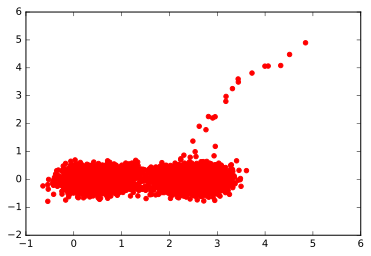

In [16]:
x_sampled = np.asarray(x_sampled)
plt.scatter( x_sampled[:,0], x_sampled[:,1], color='red')
print 'mean of MH sampled points:'
print  np.mean(x_sampled, axis=0)
print 'variance of MH sampled points:'
print  np.std(x_sampled, axis=0)
print 'acceptable points:'
print x_sampled.shape[0]

#plt.plot( x_sampled[:,0], x_sampled[:,1], color='red')

plt.show

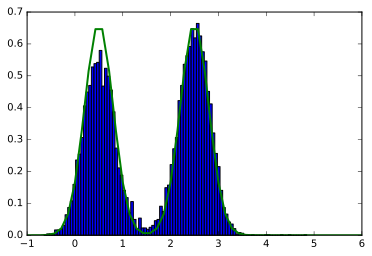

In [17]:
def p_x(x): 
    return (norm((0.5), (0.3)).pdf(x)+ norm((2.5), (0.3)).pdf(x))/2


x_hist = plt.hist(x_sampled[:,0], 100, normed=1)
x = np.linspace(-1,6) 
h = plt.plot(x, p_x(x), lw=2)
plt.show()

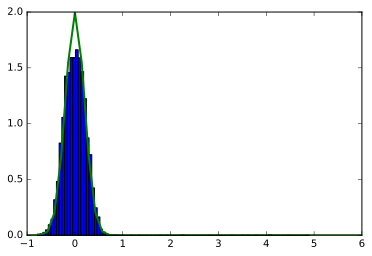

In [18]:
def p_y(y): 
    return (norm((0), (0.2)).pdf(y)+ norm((0), (0.2)).pdf(y))/2


y_hist = plt.hist(x_sampled[:,1], 100, normed=1)
y = np.linspace(-1,6) 
h = plt.plot(y, p_y(y), lw=2)
plt.show()

In [19]:
# Assumption: p(x) is directly proportional to q(x|x_i-1)
def p(x): 
    return (norm((0.5,0), (0.3, 0.2)).pdf(x)+ norm((2.5,0), (0.3, 0.2)).pdf(x))/2 

# Initialize x_0
x = [5.0,5.0]
# Number of samples
N = 20000
# I think when we are not sure
# we should keep the `sigma` as large
# as possible, so that we sample the entire space
sigma = [0.1, 0.1]
# List of sampled points
#x_sampled = np.zeros((N,2))
x_sampled = []
for i in range(N-1):
    # `u` lies in [0, 1]
    u = np.random.uniform()
    # Sample `x_star` from a gaussian distribution centered around `x`
    x_star = norm(x, sigma).rvs()
    if u < min((p(x_star)*norm(x_star, sigma).pdf(x))/(p(x)*norm(x, sigma).pdf(x_star))):
        x = x_star
        x_sampled.append(x)

mean of MH sampled points:
[ 2.33828091  0.02388916]
variance of MH sampled points:
[ 0.60272413  0.27490644]
acceptable points:
15169


<function matplotlib.pyplot.show>

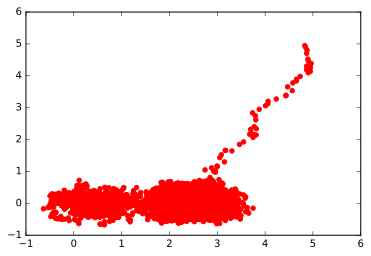

In [21]:
x_sampled = np.asarray(x_sampled)
plt.scatter( x_sampled[:,0], x_sampled[:,1], color='red')
print 'mean of MH sampled points:'
print  np.mean(x_sampled, axis=0)
print 'variance of MH sampled points:'
print  np.std(x_sampled, axis=0)
print 'acceptable points:'
print x_sampled.shape[0]

#plt.plot( x_sampled[:,0], x_sampled[:,1], color='red')

plt.show

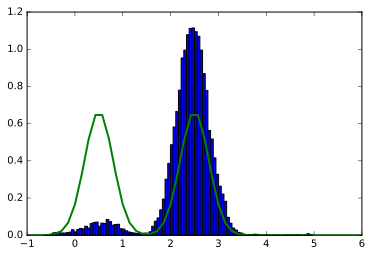

In [22]:
def p_x(x): 
    return (norm((0.5), (0.3)).pdf(x)+ norm((2.5), (0.3)).pdf(x))/2


x_hist = plt.hist(x_sampled[:,0], 100, normed=1)
x = np.linspace(-1,6) 
h = plt.plot(x, p_x(x), lw=2)
plt.show()

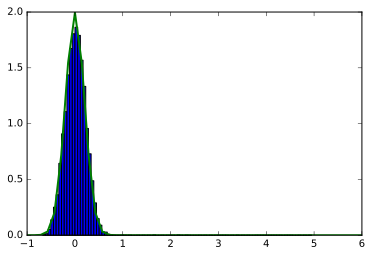

In [23]:
def p_y(y): 
    return (norm((0), (0.2)).pdf(y)+ norm((0), (0.2)).pdf(y))/2


y_hist = plt.hist(x_sampled[:,1], 100, normed=1)
y = np.linspace(-1,6) 
h = plt.plot(y, p_y(y), lw=2)
plt.show()